
## Abstract
Numerous forecasting methodologies have been proposed in economic literature, with VAR, ARMA, ARIMA, and related models standing out for time series analysis. However, accessing the requisite data for these models, especially at high frequencies such as daily, poses challenges. Even when available, timely publication of such data is often lacking. Consequently, decision-makers and economic policymakers remain unaware of daily and weekly fluctuations in the country's economy. This project aims to explore whether Google Trends data, which is published monthly, daily, and even hourly, holds predictive power for foreign trade—a crucial target variable. Daily Google Trends data spanning from 2006 to October 2023 was extracted using the Google Trends API. Concurrently, foreign trade data was sourced from the German Federal Government Statistics Office website.
## Problem statement
1. Presenting a novel deep learning approach aimed at predicting the foreign trade trends of Germany.
2. Utilizing Google Trends information to anticipate foreign trade patterns, especially in scenarios lacking access to real-time economic data.

## Method<a name="method"></a>
The methodology of our project involves leveraging the power of the Long Short-Term Memory (LSTM) model. This algorithm is subset of recurrent neural networks (RNNs) tailored to address the vanishing gradient problem commonly encountered in traditional RNNs.

Utilizing LSTM proves advantageous, particularly in analyzing economic data and time-related information, due to its adeptness in discerning patterns and relationships within sequential data over time.

In our study, I applied the LSTM model to scrutinize economic data across time periods. Our approach entailed configuring a specific architecture comprising 49 features and one target variable within the LSTM layer. We examined sequences of daily data, each spanning a length of 30 days or more, with the objective of capturing enduring relationships within the dataset.


### Data Collection<a name="data-collection"></a>
We got information from Google Trends using a special computer program called R. This program helped us find data related to business and money based on certain words. You can learn more about this program by visiting this [website](https://github.com/PMassicotte/gtrendsR). We collected Google Trends data every day from 2006 to October 2023 using a tool called Google Trends API. We also gathered information about international trade from the official website of Germany's statistics office. These are the words we looked at on Google Trends, listed below. I've simplified the names from x1 to x49.
|   | 1                   | 2                  | 3                | 4                    | 5                   | 6                   | 7                  |
|---|---------------------|--------------------|------------------|----------------------|---------------------|---------------------|--------------------|
| 1 | Aktienhandel       | Aktienkurse        | Aktienmarkt      | Aktienmarkt heute   | Altersvorsorge     | Anlageberatung     | Arbeitslosigkeit   |
| 2 | Austauschjahr      | BIP                | Besteuerung      | Einkommenssteuer    | Federal Reserve    | Finanzbericht      | Finanzkrise        |
| 3 | Finanzmärkte       | Forex -Handel      | Geldpolitik      | Handelsdefizit      | Haushaltsdefizit   | Hypothekenzinsen   | Immobilienmarkt    |
| 4 | Inflation          | Investition        | Investment Banking| Kapitalanlage       | Konjunktur         | Kredit -Score      | Kreditberatung     |
| 5 | Kryptowährung      | Marktanalyse       | Marktforschung   | Rezession           | Sparkonto          | Steuerabzüge       | Steuerreform       |
| 6 | Verbraucher        | Wechselkurse       | Welthandel       | Wirtschaft          | Wirtschaftslage    | Wirtschaftsnachrichten | Wirtschaftspolitik |
| 7 | Wirtschaftsunternehmen | Wirtschaftswachstum | Zentralbank | Zinsen              | Zwangsvollstreckung | wirtschaftliche Entwicklung | Ökonomisch |


Also the target variable "y" is German daily trade data
### Tuning hyperparameters<a name="tuning"></a>
Given the various layers present in the LSTM model and the array of hyperparameters it encompasses, it becomes imperative to ascertain both the ideal number of layers and the optimal hyperparameters. Therefore, my focus has been on fine-tuning both the neuron count and dropout rate hyperparameters to achieve optimal performance.
### evalueation model<a name="evaluate"></a>
The model's evaluation using **$R^2$** indicates that 97% of the changes in the target are explained by the features.

## References<a name="references"></a>

1. PMassicotte (n.d.). gtrendsR: An R Package for Downloading Google Trends Data. GitHub. Retrieved April 19, 2024, from https://github.com/PMassicotte/gtrendsR.
2. Foreign trade. (2023, 11 25). Retrieved from website of The Federal Statistical Office: https://www.destatis.de/EN/Home/_node.html

## Implemnetation of LSTM

### 1-Importing libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow.keras import preprocessing,layers,optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import timeseries_dataset_from_array
import math
from tensorflow.keras.layers import Dropout
from sklearn.metrics import r2_score
from contextlib import redirect_stdout
import io
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import matplotlib.pyplot as pylot

### 2-loading datasets and reporting dataset information
The code imports a dataset from a GitHub repository hosted by the user with the specified address_web. Before processing, it displays the data types of the dataset columns. Since the data is time-series data, the code sets the 'date' column as the index and removes it from the dataset columns. Additionally, to prepare the dataset for machine learning tasks, the code converts all data types to float. After these changes, it displays the data types of the dataset columns again.


In [5]:
url = "https://raw.githubusercontent.com/AZFARHAD24511/datasets/main/LSTM_daily_df.csv"
df = pd.read_csv(url)
print('dtypes before:\n',df.dtypes.head())
"""Since the data is in a time series format,
we should designate the "date" column as the index and then exclude it
from the column list. Additionally, for machine learning purposes,
it's advisable to convert numeric types to float.
"""
df.index=pd.to_datetime(df['date'])
df.set_index('date',drop=True,inplace=True)
df = df.astype(float)
print('\ndtypes after chaning data types:\n',df.dtypes.head())

dtypes before:
 date    object
x1       int64
x2       int64
x3       int64
x4       int64
dtype: object

dtypes after chaning data types:
 x1    float64
x2    float64
x3    float64
x4    float64
x5    float64
dtype: object


In [3]:
print(df.shape)
df = df.rename(columns={'y': 'target'})

(6514, 50)


### 3 data information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6514 entries, 1/1/2006 to 11/1/2023
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      6514 non-null   float64
 1   x2      6514 non-null   float64
 2   x3      6514 non-null   float64
 3   x4      6514 non-null   float64
 4   x5      6514 non-null   float64
 5   x6      6514 non-null   float64
 6   x7      6514 non-null   float64
 7   x8      6514 non-null   float64
 8   x9      6514 non-null   float64
 9   x10     6514 non-null   float64
 10  x11     6514 non-null   float64
 11  x12     6514 non-null   float64
 12  x13     6514 non-null   float64
 13  x14     6514 non-null   float64
 14  x15     6514 non-null   float64
 15  x16     6514 non-null   float64
 16  x17     6514 non-null   float64
 17  x18     6514 non-null   float64
 18  x19     6514 non-null   float64
 19  x20     6514 non-null   float64
 20  x21     6514 non-null   float64
 21  x22     6514 non-null   float6

### 4- Splitting dataset to train and test and reporting thier shape or dimensions

In [15]:
# spliting the dataset into train and test an valid_start_index(vsi) and test_start_index(tsi)

vsi=int(df.shape[0]*0.70)
tsi=int(df.shape[0]*0.85)
dftrain=df.iloc[0:vsi]
dfvalid=df.iloc[vsi:tsi]
dftest=df.iloc[tsi:]

Xtrain=dftrain.drop("target",axis=1)
Xvalid=dfvalid.drop('target',axis=1)
Xtest=dftest.drop("target",axis=1)
ytrain=dftrain["target"]
y_valid=dfvalid["target"]
ytest=dftest["target"]
print(f'Xtrain size is :{Xtrain.shape} \n Xvalid size is :{Xvalid.shape} \n Xtest size is :{Xtest.shape}')
print(f'ytrain size is :{ytrain.shape} \n y_valid size is :{y_valid.shape} \n ytest size is :{ytest.shape}')

Xtrain size is :(4559, 49) 
 Xvalid size is :(977, 49) 
 Xtest size is :(978, 49)
ytrain size is :(4559,) 
 y_valid size is :(977,) 
 ytest size is :(978,)


### 5-Standardizaion features

In [16]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
Xtrain=std.fit_transform(Xtrain)
Xvalid=std.transform(Xvalid)
Xtest=std.transform(Xtest)

### 6-creating sequences
In this code snippet, we're preparing our data for model training. We define the length of each sequence of data to be 10 time steps and specify that we want to process our data in batches of 50 sequences at a time. Using the `preprocessing.timeseries_dataset_from_array` function, we create training, valid, and test datasets. For each dataset, we provide the input data (`Xtrain`, `Xvalid`, `Xtest`) and the corresponding target labels (`ytrain`, `y_valid`, `ytest`). We set the sequence length and batch size for each dataset to the values we defined earlier. This process helps us organize our data into suitable formats for training and evaluating our model.


In [17]:
sequence_length=10
bach_size=50
inps=(sequence_length,Xtrain.shape[1])
dts_train=timeseries_dataset_from_array(
Xtrain,
ytrain,
sequence_length=sequence_length,
batch_size=bach_size,
)
dts_valid=timeseries_dataset_from_array(
Xvalid,
y_valid,
sequence_length=sequence_length,
batch_size=bach_size,
)
dts_test=timeseries_dataset_from_array(
Xtest,
ytest,
sequence_length=sequence_length,
batch_size=bach_size,
)
print('Xtrain.shape is:',Xtrain.shape)
print('Xtest.shape is:',Xtest.shape)
print('ytrain.shape is:',ytrain.shape)
print('ytest.shape is:',ytest.shape)
print('Xvalid.shape is:',Xvalid.shape)
print('yvalid.shape is:',y_valid.shape)

Xtrain.shape is: (4559, 49)
Xtest.shape is: (978, 49)
ytrain.shape is: (4559,)
ytest.shape is: (978,)
Xvalid.shape is: (977, 49)
yvalid.shape is: (977,)


### 7- model tuning
I want to implement an LSTM model. I assume that this model has three hidden layers. Of course, I came to this conclusion based on experience. Now I assume that there are 96, 64 and 32 neurons in the first, second and third layer respectively. I also assume I set the dropout to be 0.5. Assuming this, my pattern will be as follows.

In [32]:
Reg=Sequential()
Reg.add(layers.Input(shape=inps))
Reg.add(layers.LSTM(96, return_sequences=True,activation='relu'))
Reg.add(layers.LSTM(32, return_sequences=True))
Reg.add(layers.LSTM(32,activation='linear'))
Reg.add(Dropout(0.5))
Reg.add(layers.Dense(1))
Reg.summary()

Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_111 (LSTM)                      │ (None, 10, 96)              │          56,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_112 (LSTM)                      │ (None, 10, 32)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_113 (LSTM)                      │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 80,929 (316.13 KB)

 Trainable params: 80,929 (316.13 KB)

 Non-trainable params: 0 (0.00 B)

Now I want to compile this model. There are several parameters and hyperparameters here. For example, I considered the learning rate as 0.001. On the other hand, I considered **Adam** as the optimizer function. All these parameters can be changed and my goal is to achieve high **$R^2$ and low **RMSE**.


In [33]:
Reg.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss='mse')
es_cb=tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0,patience=5)
Reg.fit(dts_train,epochs=50,validation_data=dts_valid,shuffle=False,callbacks=[es_cb])

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - loss: 1083741765632.0000 - val_loss: 102434521088.0000
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 184461934592.0000 - val_loss: 20020842496.0000
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 76194373632.0000 - val_loss: 17180512256.0000
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 67471040512.0000 - val_loss: 12036239360.0000
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 64185241600.0000 - val_loss: 14492125184.0000
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 54457753600.0000 - val_loss: 12414909440.0000
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 54845763584.0000 - val_loss: 12319726592.0000
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 53721346048.0000 - val_loss: 13104956416.0000
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 52529340416.0000 - val_loss: 12547340288.0000


As can be seen, the result is not very acceptable and $R^2$ Score: **0.6755486945774267**.This following code allows us to suppress any output produced within the loop from appearing in the very long console.

In [34]:
real = []
pred = []
with io.StringIO() as buf, redirect_stdout(buf):
    for (x, y) in dts_test:
        real += y.numpy().tolist()
        p = Reg.predict(x)
        pred += p.ravel().tolist()

print("Length of real:", len(real))
print("Length of pred:", len(pred))

rr = r2_score(real, pred)
print("R2_Score:", rr)

Length of real: 969
Length of pred: 969
R2_Score: 0.6755486945774267


This code generates a line plot using the Plotly library, depicting the comparison between real and pred values over time. The x-axis represents the date, while the y-axis represents the net mass of exports in million tonnes.Comparing the graph of the pred values with the real value also indicates that this model is not working properly.

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dftest.index, y=real, mode='lines', name='real'))
fig.add_trace(go.Scatter(x=dftest.index, y=pred, mode='lines', name='pred'))

fig.update_layout(
    title="",
    xaxis_title='Date',
    yaxis_title='Export(net mass Million tones)',
    height=600,  # Set the height of the plot in pixels
    width=1000,
    legend=dict(x=0.5, y=1.0),# Set the width of the plot in pixels
)

fig.write_image("d:/latex/pred_vs_real.png")
fig.show()

The code trains a machine learning model using the fit function. It trains the model on a training dataset for 50 epochs, evaluating its performance on a separate valid dataset. The fit function returns a history object containing metrics like loss and accuracy for each epoch, which helps in analyzing and adjusting the model's performance.


In [24]:
hist = Reg.fit(dts_train, epochs=50, validation_data=dts_valid)

Epoch 1/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 39053373440.0000 - val_loss: 12242124800.0000
Epoch 2/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 45457043456.0000 - val_loss: 15411545088.0000
Epoch 3/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 40296591360.0000 - val_loss: 25834622976.0000
Epoch 4/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 42025336832.0000 - val_loss: 12282363904.0000
Epoch 5/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 42569740288.0000 - val_loss: 11234214912.0000
Epoch 6/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 46525493248.0000 - val_loss: 14722801664.0000
Epoch 7/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 49748148224.0000 - val_loss: 9197532160.0000
Epoch 8/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 43795234816.0000 - val_loss: 10076416000.0000
Epoch 9/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 40895930368.0000 - val_loss: 10738744320.0000
Epoch 10/50
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - lo

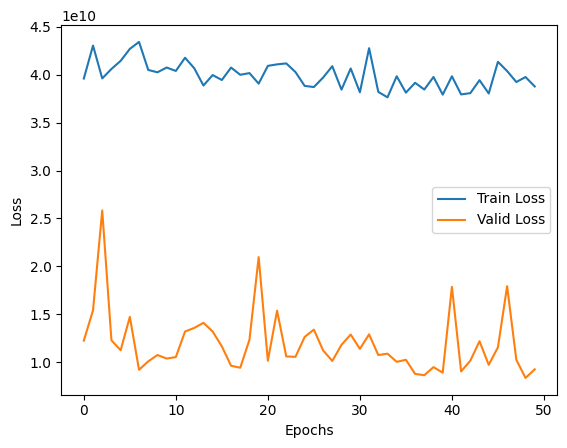

In [25]:
pylot.plot(hist.history['loss'], label='Train Loss')
pylot.plot(hist.history['val_loss'], label='Valid Loss')
pylot.xlabel('Epochs')
pylot.ylabel('Loss')
pylot.legend()
pylot.show()


### 7-1-crating pipeline
In this section, it is assumed that the LSTM model has one input layer, three hidden layers and one output layer. With this assumption and by imposing the number of neurons of the first, second and third layer as 96, 32, 32 respectively, it was observed that the **$R^2$**  recorded poor performance .
Now I consider the assumption of 5 layers of the model to be fixed and I want to manipulate the number of neurons and dropout. For ease of work, I wrote my codes as a **pipeline class**.

### 7-2-Tuning neurons and dropout
The provided code defines a pipeline class that automates the process Machin lerning:\
This code is about training a machine learning model using a special type of neural network called Long Short-Term Memory (LSTM). The model is trained to predict future values based on past data.\
1. The data is imported from a website and preprocessed.
2. It is split into training, validation, and testing sets.
3. The data is standardized to ensure all features have the same scale.
4. The data is organized into sequences, which are fed into the LSTM model for training.
5. The model architecture is defined with multiple LSTM layers followed by a dropout layer to prevent overfitting.
6. The model is trained for multiple combinations of LSTM units, and the performance is evaluated using the 𝑅² score, which measures how well the model predicts the data.
7. Finally, the results are compared to find the best combination of LSTM units and dropout rate for the model.

In this step, I tried to automatically extract all the pipeline, but only tuned two hyperparameters. This is really the number of neurons and dropout in the three hypothesized hidden layers of LSTM.
```
lstm_units_values = [[16, 64, 32],[16, 64, 16],[16, 64, 8],[16, 32, 32],[16, 32, 16],[16, 32, 8]]
dropout_values = [0.01, 0.015, 0.02]
```
the result can be seen in the table below that the **$R^2$** number is slightly more than 98%.
As you can see, with the number of neurons in the first to third layers and the following Dropout, a higher number can be achieved.With LSTM_units:**[16, 64, 16]**  and Dropout: **0.015** the **$R^2$** score is 97%

| Pipeline                | LSTM_units   | Dropout | R2_score |
|-------------------------|--------------|---------|----------|
| Pipe_Line_2_Dropout_0.01| [16, 64, 16] | **0.010**   | **0.969108** |
| Pipe_Line_1_Dropout_0.015| [16, 64, 32] | 0.015   | 0.954294 |
| Pipe_Line_2_Dropout_0.015| [16, 64, 16] | 0.015   | 0.964002 |
| Pipe_Line_1_Dropout_0.02 | [16, 64, 32] | 0.020   | 0.937698 |
| Pipe_Line_4_Dropout_0.015| [16, 32, 32] | 0.015   | 0.926979 |
| Pipe_Line_4_Dropout_0.02 | [16, 32, 32] | 0.020   | 0.931688 |
| Pipe_Line_5_Dropout_0.015| [16, 32, 8]  | 0.015   | 0.938163 |
| Pipe_Line_5_Dropout_0.01 | [16, 32, 8]  | 0.010   | 0.894652 |
| Pipe_Line_1_Dropout_0.01 | [16, 64, 32] | 0.010   | 0.916466 |
| Pipe_Line_4_Dropout_0.01 | [16, 32, 32] | 0.010   | 0.906207 |
| Pipe_Line_2_Dropout_0.02 | [16, 64, 16] | 0.020   | 0.961831 |
| Pipe_Line_3_Dropout_0.02 | [16, 64, 8]  | 0.020   | -0.341800 |
| Pipe_Line_3_Dropout_0.015| [16, 64, 8]  | 0.015   | -0.367244 |
| Pipe_Line_3_Dropout_0.01 | [16, 64, 8]  | 0.010   | -0.309727 |
| Pipe_Line_5_Dropout_0.02 | [16, 32, 8]  | 0.020   | 0.887368 |



In [31]:
class Pipe_Line:
    def __init__(self, url):
        self.url = url
        self.data = None
        self.Xtrain = None
        self.Xvalid = None
        self.Xtest = None
        self.ytrain = None
        self.y_valid = None
        self.ytest = None
        self.dts_train = None
        self.dts_valid = None
        self.dts_test = None
        self.Reg = None
        self.results = {}

    def import_data(self):
        self.data = pd.read_csv(self.url)
        self.data.index = pd.to_datetime(self.data['date'])
        self.data.drop(columns=['date'], inplace=True)
        self.data = self.data.astype(float)
        self.data['target'] = self.data['y'].shift(-1)
        self.data = self.data.dropna()

    def split_data(self):
        vsi = int(self.data.shape[0] * 0.70)
        tsi = int(self.data.shape[0] * 0.85)
        dftrain = self.data.iloc[:vsi]
        dfvalid = self.data.iloc[vsi:tsi]
        dftest = self.data.iloc[tsi:]

        self.Xtrain = dftrain.drop("target", axis=1)
        self.Xvalid = dfvalid.drop('target', axis=1)
        self.Xtest = dftest.drop("target", axis=1)
        self.ytrain = dftrain["target"]
        self.y_valid = dfvalid["target"]
        self.ytest = dftest["target"]

    def standardize_data(self):
        scaler = StandardScaler()
        self.Xtrain = scaler.fit_transform(self.Xtrain)
        self.Xvalid = scaler.transform(self.Xvalid)
        self.Xtest = scaler.transform(self.Xtest)

    def sequence_data(self, sequence_length=10, batch_size=50):
        self.dts_train = timeseries_dataset_from_array(
            self.Xtrain,
            self.ytrain,
            sequence_length=sequence_length,
            batch_size=batch_size
        )
        self.dts_valid = timeseries_dataset_from_array(
            self.Xvalid,
            self.y_valid,
            sequence_length=sequence_length,
            batch_size=batch_size
        )
        self.dts_test = timeseries_dataset_from_array(
            self.Xtest,
            self.ytest,
            sequence_length=sequence_length,
            batch_size=batch_size
        )

    def build_model(self, lstm_units=[16, 64, 32], dropout=0.2, learning_rate=0.001):
        inps = (self.dts_train.element_spec[0].shape[1], self.dts_train.element_spec[0].shape[2])
        self.Reg = Sequential()
        self.Reg.add(tf.keras.layers.Input(shape=inps))
        for units in lstm_units[:-1]:
            self.Reg.add(tf.keras.layers.LSTM(units, return_sequences=True))
        self.Reg.add(tf.keras.layers.LSTM(lstm_units[-1], activation='linear'))
        self.Reg.add(Dropout(dropout))
        self.Reg.add(layers.Dense(1))
        self.Reg.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss='mse')

    def train_model(self, epochs=40, early_stopping_patience=5):
        es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=early_stopping_patience)
        self.Reg.fit(self.dts_train, epochs=epochs, validation_data=self.dts_valid, shuffle=False, callbacks=[es])

    def calculate_r2(self):
        self.dftest = self.split_data()
        real = []
        pred = []
        with io.StringIO() as buf, redirect_stdout(buf):
            for (x, y) in self.dts_test:
                real += y.numpy().tolist()
                p = self.Reg.predict(x)
                pred += p.ravel().tolist()

        print("Length of real:", len(real))
        print("Length of pred:", len(pred))

        rr = r2_score(real, pred)
        return rr

    def run_Pipe_Line(self, lstm_units_values, dropout_values):
        for idx, units in enumerate(lstm_units_values):
            for dropout in dropout_values:
                print(f"Running Pipe_Line {idx+1}/{len(lstm_units_values)} with LSTM units: {units}, dropout: {dropout}")
                self.build_model(lstm_units=units, dropout=dropout)
                self.train_model()
                r2_score = self.calculate_r2()
                self.results[f"Pipe_Line_{idx+1}_Dropout_{dropout}"] = {"LSTM_units": units, "Dropout": dropout, "R2_score": r2_score}

    def compare_results(self):
        results_df = pd.DataFrame.from_dict(self.results, orient='index')
        return results_df

lstm_units_values = [[16, 64, 32],[16, 64, 16],[16, 64, 8],[16, 32, 32],[16, 32, 8]]
dropout_values = [0.01, 0.015, 0.02]
Pipe_Line = Pipe_Line(url)
Pipe_Line.import_data()
Pipe_Line.split_data()
Pipe_Line.standardize_data()
Pipe_Line.sequence_data()
Pipe_Line.run_Pipe_Line(lstm_units_values, dropout_values)
results_df = Pipe_Line.compare_results()
results_df


Running Pipe_Line 1/5 with LSTM units: [16, 64, 32], dropout: 0.01
Epoch 1/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - loss: 1115000537088.0000 - val_loss: 254350049280.0000
Epoch 2/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 124052307968.0000 - val_loss: 38674198528.0000
Epoch 3/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 87767826432.0000 - val_loss: 30954625024.0000
Epoch 4/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 72766455808.0000 - val_loss: 29179252736.0000
Epoch 5/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 67499749376.0000 - val_loss: 28281321472.0000
Epoch 6/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 62729400320.0000 - val_loss: 27170916352.0000
Epoch 7/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 57963184128.0000 - val_loss: 25365127168.0000
Epoch 8/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 51887894528.0000 - val_loss: 23363262464.0000
Epoch 9/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 44269232128.0000 - val_loss: 

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3955020288.0000 - val_loss: 1468573568.0000
Epoch 37/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3601025280.0000 - val_loss: 1386163712.0000
Epoch 38/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3761277952.0000 - val_loss: 2068851712.0000
Epoch 39/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3702889472.0000 - val_loss: 1366614528.0000
Epoch 40/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3127917824.0000 - val_loss: 1637246336.0000
Length of real: 968
Length of pred: 968
Running Pipe_Line 2/5 with LSTM units: [16, 64, 16], dropout: 0.01
Epoch 1/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - loss: 1145969967104.0000 - val_loss: 810332585984.0000
Epoch 2/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 241444864000.0000 - val_loss: 42732978176.0000
Epoch 3/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 88170332160.0000 - val_loss: 36232482816.0000
Epoch 4/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7505069

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4667422208.0000 - val_loss: 1425936384.0000
Epoch 32/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4524660736.0000 - val_loss: 1439636480.0000
Epoch 33/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4361654784.0000 - val_loss: 1677506688.0000
Epoch 34/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4089987072.0000 - val_loss: 1235150336.0000
Epoch 35/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4699106304.0000 - val_loss: 1713526400.0000
Epoch 36/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 4015143936.0000 - val_loss: 1096660992.0000
Epoch 37/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3727820800.0000 - val_loss: 1327977728.0000
Epoch 38/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3893482240.0000 - val_loss: 1364045440.0000
Epoch 39/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4002725632.0000 - val_loss: 1214774912.0000
Epoch 40/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3456975104.0000 

Epoch 10/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 55933075456.0000 - val_loss: 30730483712.0000
Epoch 11/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 53065236480.0000 - val_loss: 28300380160.0000
Epoch 12/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 49017634816.0000 - val_loss: 26245773312.0000
Epoch 13/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 44949516288.0000 - val_loss: 23705042944.0000
Epoch 14/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 40475160576.0000 - val_loss: 21177784320.0000
Epoch 15/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 36606984192.0000 - val_loss: 18721837056.0000
Epoch 16/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 32355573760.0000 - val_loss: 15988276224.0000
Epoch 17/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 28491927552.0000 - val_loss: 13735873536.0000
Epoch 18/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 25735952384.0000 - val_loss: 12093172736.0000
Epoch 19/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7421554688.0000 - val_loss: 4292283648.0000
Epoch 29/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6892469248.0000 - val_loss: 3515349248.0000
Epoch 30/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 6218638848.0000 - val_loss: 3234585600.0000
Epoch 31/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5750867456.0000 - val_loss: 2914103808.0000
Epoch 32/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5526124032.0000 - val_loss: 2887336192.0000
Epoch 33/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5323447808.0000 - val_loss: 2924558592.0000
Epoch 34/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 5325298688.0000 - val_loss: 2661939200.0000
Epoch 35/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4859702784.0000 - val_loss: 2193119488.0000
Epoch 36/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4479878144.0000 - val_loss: 1906313472.0000
Epoch 37/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 4270640640.0000 

91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 15784415232.0000 - val_loss: 8406365696.0000
Epoch 24/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 14637592576.0000 - val_loss: 7310682624.0000
Epoch 25/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 13314724864.0000 - val_loss: 6573046272.0000
Epoch 26/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 11652897792.0000 - val_loss: 6026337280.0000
Epoch 27/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 11191215104.0000 - val_loss: 5657292800.0000
Epoch 28/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 10835517440.0000 - val_loss: 5152554496.0000
Epoch 29/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9880039424.0000 - val_loss: 4614171648.0000
Epoch 30/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9884108800.0000 - val_loss: 4353260032.0000
Epoch 31/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 9078832128.0000 - val_loss: 4178208768.0000
Epoch 32/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 7553753088

,LSTM_units,Dropout,R2_score
Pipe_Line_1_Dropout_0.01,"[16, 64, 32]",0.010,0.916466
Pipe_Line_1_Dropout_0.015,"[16, 64, 32]",0.015,0.954294
Pipe_Line_1_Dropout_0.02,"[16, 64, 32]",0.020,0.937698
Pipe_Line_2_Dropout_0.01,"[16, 64, 16]",0.010,0.969108
Pipe_Line_2_Dropout_0.015,"[16, 64, 16]",0.015,0.964002
Pipe_Line_2_Dropout_0.02,"[16, 64, 16]",0.020,0.961831
Pipe_Line_3_Dropout_0.01,"[16, 64, 8]",0.010,-0.309727
Pipe_Line_3_Dropout_0.015,"[16, 64, 8]",0.015,-0.367244
Pipe_Line_3_Dropout_0.02,"[16, 64, 8]",0.020,-0.341800
Pipe_Line_4_Dropout_0.01,"[16, 32, 32]",0.010,0.906207


## final reuslt
Of course, LSTM  also has other hyperparameters, and due to the time-consuming nature of their testing, I only limited myself to these two. Since the result of this model was associated with high **$R^2$** , I considered this as a final model.
## Future research:
One of the things that should be done in future research is tuning the number of optimal layers for the LSTM model. Little work has been done in this regard.

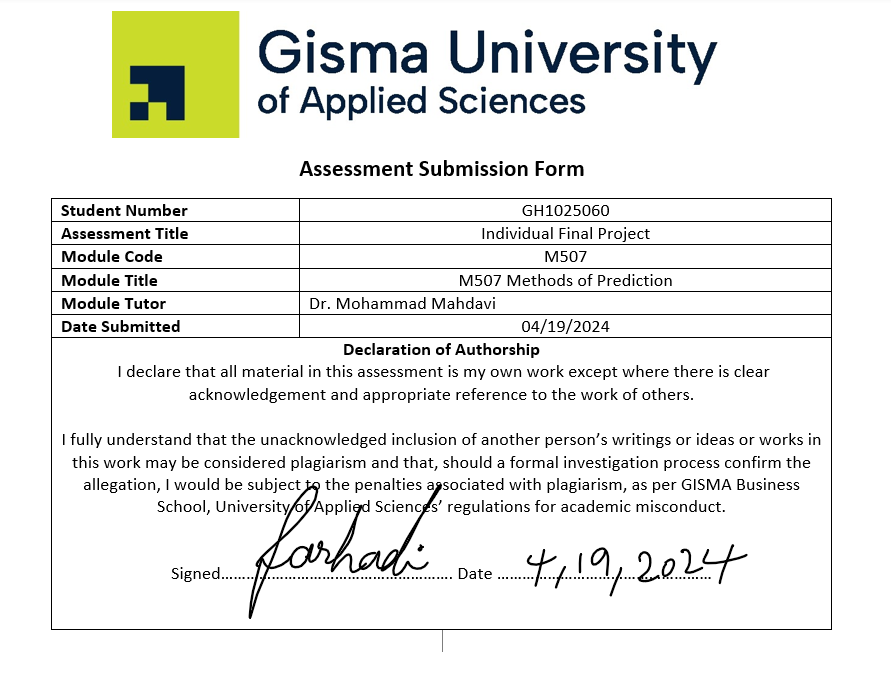